In [1]:
import pylab, numpy

In [3]:
def importData(filename):
    data = {}
    with open(filename, 'r') as dataFile:
        headers = dataFile.readline().strip().split(DELIMITER)
        for header in headers:
            data[header] = []
        for line in dataFile:
            datarecord = line.strip().split(DELIMITER)
            for index, value in enumerate(datarecord):
                data[headers[index]].append(value)
    return data

## Statistics Package Exercise: Exploring Variables in a Dataset

In [48]:
FILENAME = './data/depression.csv'
DELIMITER = ','

data = importData(FILENAME)
gender = ['Female' if g == '1' else 'Male' for g in data['Gender']]
print(gender)

['Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Fema

## Statistics Package Exercise: Tallying Data and Creating Pie Charts

In [60]:
def buildPivotTable(values):
    props = {}
    for data in values:
        count = props.get(data)
        if count is None:
            props[data] = 1
        else:
            props[data] = count + 1
    return props

{'Opposite sex': 434, 'No difference': 602, 'Same sex': 164}


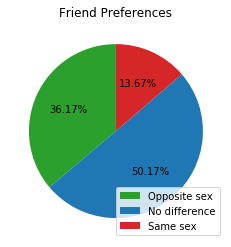

In [62]:
FILENAME = './data/friends.csv'
DELIMITER = ','

data = importData(FILENAME)
friends = data['Friends']
pivotTable = buildPivotTable(friends)
print(pivotTable)
pylab.figure()
pylab.pie(pivotTable.values(), labels = pivotTable.keys(), labeldistance = None, autopct = '%.2f%%', startangle = 90, colors = ['tab:green', 'tab:blue', 'tab:red'])
pylab.title('Friend Preferences')
pylab.legend()
pylab.show()

## Statistics Package Exercise: Creating and Describing Histograms

(array([ 1.,  4., 10.,  8.,  8.,  6.,  2.,  4.,  0.,  0.,  1.]), array([25.        , 29.90909091, 34.81818182, 39.72727273, 44.63636364,
       49.54545455, 54.45454545, 59.36363636, 64.27272727, 69.18181818,
       74.09090909, 79.        ]), <a list of 11 Patch objects>)


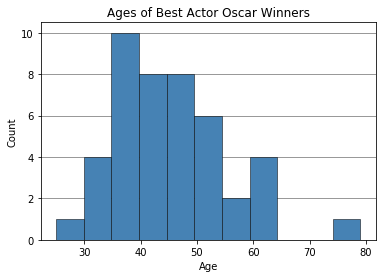

In [35]:
FILENAME = './data/actor_2013.csv'
DELIMITER = ','

ages = importData(FILENAME)
ageValues = [int(age) for age in ages['Age']]
figure = pylab.figure()    
plot = figure.add_subplot(1, 1, 1)
print(pylab.hist(ageValues, bins=11, range=(25, 79), color='steelblue', edgecolor='black', linewidth=0.5))
pylab.title('Ages of Best Actor Oscar Winners')
pylab.xlabel('Age')
pylab.ylabel('Count')
plot.set_axisbelow(True)
plot.yaxis.grid(color='gray', linestyle='solid')
pylab.show()

## Statistics Package Exercise: Interpreting The Five Number Summary

In [37]:
desc = {}
desc['min'] = numpy.min(ageValues)
desc['Q1']  = numpy.quantile(ageValues, 0.25)
desc['median'] = numpy.median(ageValues)
desc['Q3']  = numpy.quantile(ageValues, 0.75)
desc['max'] = numpy.max(ageValues)
print(desc)

{'min': 29, 'Q1': 38.0, 'median': 43.5, 'Q3': 50.25, 'max': 76}


## Statistics Package Exercise: Creating Side-by-Side Boxplots

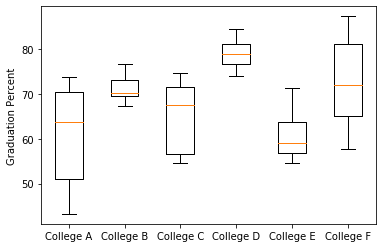

In [47]:
FILENAME = './data/graduation.csv'
DELIMITER = ','

data = importData(FILENAME)
collegeGroup = {}
for college, gradPercent in zip(*list(data.values())):
    if collegeGroup.get(college) is None:
        collegeGroup[college] = [float(gradPercent)]
    else:
        collegeGroup[college].append(float(gradPercent))

pylab.boxplot(collegeGroup.values(), labels = ['College A', 'College B', 'College C', 'College D', 'College E', 'College F'])
pylab.ylabel('Graduation Percent')
pylab.show()

### Statistics Package Exercise: Calculating the Standard Deviation

In [51]:
FILENAME = './data/sdintuition.csv'
DELIMITER = ','

data = importData(FILENAME)
class_1 = [int(rating) for rating in data['Class I']]
class_2 = [int(rating) for rating in data['Class II']]
class_3 = [int(rating) for rating in data['Class III']]
print(round(pylab.std(class_1), 2))
print(round(pylab.std(class_2), 2))
print(round(pylab.std(class_3), 2))

1.54
3.93
2.58


## Statistics Package Exercise: Building A Two-Way Table

{'no light': {'No': 90.12, 'Yes': 9.88}, 'night light': {'No': 65.95, 'Yes': 34.05}, 'lamp': {'No': 45.33, 'Yes': 54.67}}
{'No': [90.12, 65.95, 45.33], 'Yes': [9.88, 34.05, 54.67]}


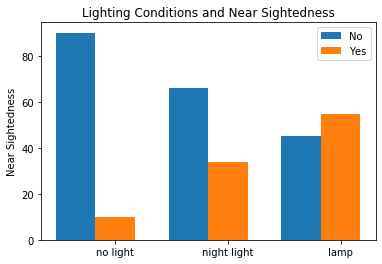

In [68]:
FILENAME = './data/nightlight.csv'
DELIMITER = ','

def buildTwoWayTable(table):
    twoWayTable = {}
    for index, key in enumerate(table):
        twoWayTable[key] = buildPivotTable(table[key])
    return twoWayTable

def buildPercentageTable(twoWayTable):
    percentTable = {}
    for row in twoWayTable:
        percentTable[row] = {}
        for col in twoWayTable[row]:
            percentTable[row][col] = round((twoWayTable[row][col] / sum(twoWayTable[row].values())) * 100, 2)
    return percentTable 

data = importData(FILENAME)
lightGroup = {}
for lightType, nearsightedness in zip(*list(data.values())):
    if lightGroup.get(lightType) is None:
        lightGroup[lightType] = [nearsightedness]
    else:
        lightGroup[lightType].append(nearsightedness)
        
twoWayTable = buildTwoWayTable(lightGroup)
percentTable = buildPercentageTable(twoWayTable)
print(percentTable)

summary = {}
for x in percentTable:
    for y in percentTable[x]:
        if summary.get(y) is None: 
            summary[y] = [percentTable[x][y]]
        else:
            summary[y].append(percentTable[x][y])
print(summary)
keys = list(summary.keys())
values = list(summary.values())
bar_width = 0.35
N = len(percentTable)
index = numpy.arange(N)

for i in range(len(values)):
    pylab.bar(index + bar_width*i, values[i], bar_width, label=keys[i])

pylab.title('Lighting Conditions and Near Sightedness')
pylab.xticks(index + bar_width, list(percentTable.keys()))
pylab.ylabel('Near Sightedness')
pylab.legend()
pylab.show()

## Statistics Package Exercise: Creating a Scatterplot

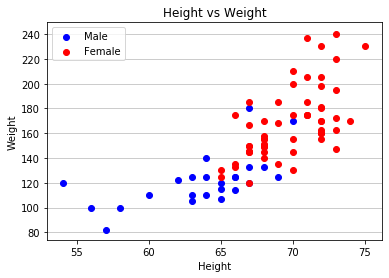

In [73]:
FILENAME = './data/height.csv'
DELIMITER = ','

data = importData(FILENAME)
data['gender'] = ['Female' if value == '0' else 'Male' for value in data['gender']]
data['height'] = [int(height) for height in data['height']]
data['weight'] = [int(weight) for weight in data['weight']]

male_height, male_weight, female_height, female_weight = [], [], [], []
for gender, height, weight in zip(*list(data.values())):
    if gender == 'Male':
        male_height.append(height)
        male_weight.append(weight)
    else:
        female_height.append(height)
        female_weight.append(weight)

figure = pylab.figure()    
plot = figure.add_subplot(1, 1, 1)
pylab.scatter(male_height, male_weight, color = 'blue', label = 'Male')
pylab.scatter(female_height, female_weight, color = 'red', label = 'Female')
pylab.title('Height vs Weight')
pylab.xlabel('Height')
pylab.ylabel('Weight')
plot.set_axisbelow(True)
plot.yaxis.grid(color = 'gray', linestyle = 'solid', alpha = 0.5)
plot.legend()
pylab.show()

## Statistics Package Exercise: Computing a Correlation

[[1.         0.66323967]
 [0.66323967 1.        ]]


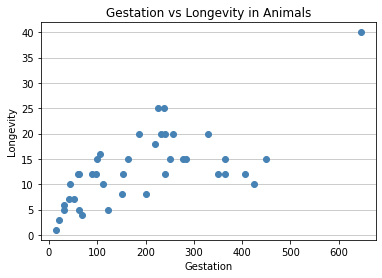

In [74]:
FILENAME = './data/animals.csv'
DELIMITER = ','

data = importData(FILENAME)
gestations = [int(gestation) for gestation in data['gestation']]
longevitys = [int(longevity) for longevity in data['longevity']]
print(numpy.corrcoef(gestations, longevitys))

figure = pylab.figure()    
plot = figure.add_subplot(1, 1, 1)
pylab.scatter(gestations, longevitys, color = 'steelblue')
pylab.title('Gestation vs Longevity in Animals')
pylab.xlabel('Gestation')
pylab.ylabel('Longevity')
plot.set_axisbelow(True)
plot.yaxis.grid(color = 'gray', linestyle = 'solid', alpha = 0.5)
pylab.show()

## Statistics Package Exercise: Finding a Regression Line

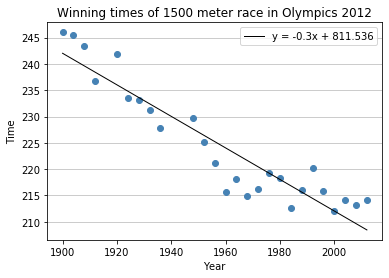

In [75]:
FILENAME = './data/olympics_2012.csv'
DELIMITER = ','

data = importData(FILENAME)
years = [int(year) for year in data['Year']]
times = [float(time) for time in data['Time']]

years = pylab.array(years)
times = pylab.array(times)

figure = pylab.figure()    
plot = figure.add_subplot(1, 1, 1)
plot.set_axisbelow(True)
plot.yaxis.grid(color='gray', linestyle='solid', alpha=0.5)

pylab.scatter(years, times, color='steelblue')
pylab.title('Winning times of 1500 meter race in Olympics 2012')
pylab.xlabel('Year')
pylab.ylabel('Time')
a, b = pylab.polyfit(years, times, 1)
label = f'y = {round(a, 3)}x + {round(b, 3)}'
estTimes = a * years + b
pylab.plot(years, estTimes, color='black', label=label, linewidth=1)
pylab.legend()
pylab.show()